# K-Means Clustering from Scratch

## Download Dataset

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [60]:
warnings.filterwarnings("ignore")

## Working with Dummy Data

In [61]:
seed = 99

### Generate Dummy Data

In [62]:
np.random.seed(seed)

cluster_1 = np.random.normal(loc=[6,5], scale=1, size=(50,2))
cluster_2 = np.random.normal(loc=[2,4], scale=1, size=(50,2))
cluster_3 = np.random.normal(loc=[2,7], scale=0.8, size=(50,2))

cluster_1.shape

(50, 2)

In [63]:
features = np.vstack([cluster_1, cluster_2, cluster_3])

features.shape

(150, 2)

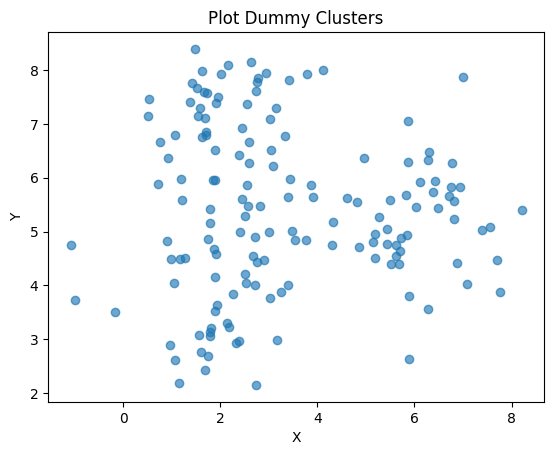

In [64]:
plt.scatter(features[:, 0], features[:, 1], alpha=0.65)
plt.title('Plot Dummy Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### 1. Initialise Random Centroids

We have pick the centroids from the list of points we have in our dataset

In [65]:
def init_centroids(num_centroids):
    
    np.random.seed(seed)
    centroid_indices = np.random.choice(features.shape[0], size=num_centroids, replace=False) # randomly pick indices from 0 - 150
    return features[centroid_indices]

In [66]:
centroids = init_centroids(3)

centroids

array([[3.78719891, 7.9323237 ],
       [6.88281715, 4.41991834],
       [3.24447987, 3.87191785]])

In [67]:
def plot_centroids(centroids):

    plt.figure(figsize=(8,6))

    plt.scatter(features[:, 0], features[:, 1], c='blue', alpha=0.5, label="Data Points")
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label="Centroids")
    plt.title(f"Number of Centroids = 3")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()

    plt.tight_layout()
    plt.show()   

In [68]:
def plot_clusters(centroids, feature_assignment):
    plt.figure(figsize=(8, 6))
    
    colors = plt.cm.tab10(range(len(centroids)))  # colormap to generate distinct colors

    for i, cluster_points in enumerate(feature_assignment):
        cluster_points = np.array(cluster_points)  # Convert to NumPy array
        if len(cluster_points) > 0:  # Only plot if the cluster is not empty
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], alpha=0.6, label=f"Cluster {i + 1}")
    
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100, label="Centroids")
    
    plt.title(f"Clusters with Centroids")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.tight_layout()
    plt.show()


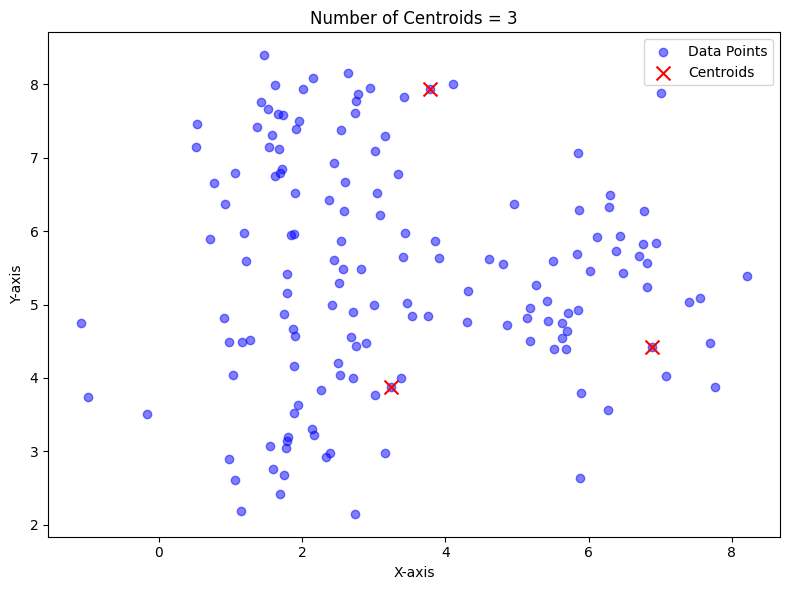

In [69]:
plot_centroids(centroids)

### 2. Assign Points to Cluster

For each feature take Eucledian Distance and pick the centroid which is closest to the point

In [70]:
def assign_points_to_cluster(centroids, features):

    feature_assignment = [[] for _ in range(len(centroids))]

    for f in features:
        distances = []
        for c in centroids:
            distances.append(np.linalg.norm(f - c))

        closest_centroid_idx = np.argmin(distances)
        feature_assignment[closest_centroid_idx].append(f)
    
    return feature_assignment

### 3. Recalculate Cluster Position

Take a look at all the points assigned to particular clusters and recalcuate the centroids for each of the cluster

In [71]:
def calculate_position(feature_assingment):
    
    new_centroids = []

    for cluster in feature_assingment:
        
        if len(cluster) > 0:
            new_centroids.append(np.mean(cluster, 0))
        else:
            new_centroids.append(None)

    return np.array(new_centroids)

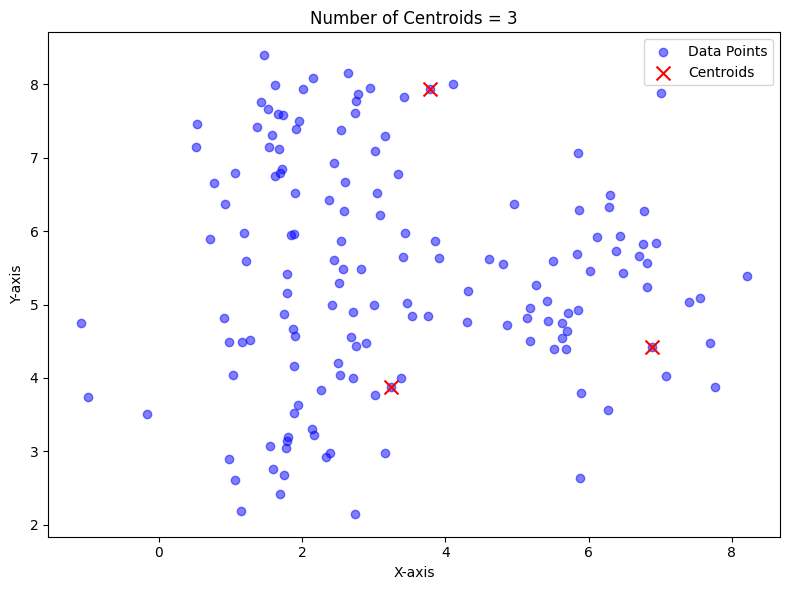

In [72]:
plot_centroids(centroids)

Iteration 1


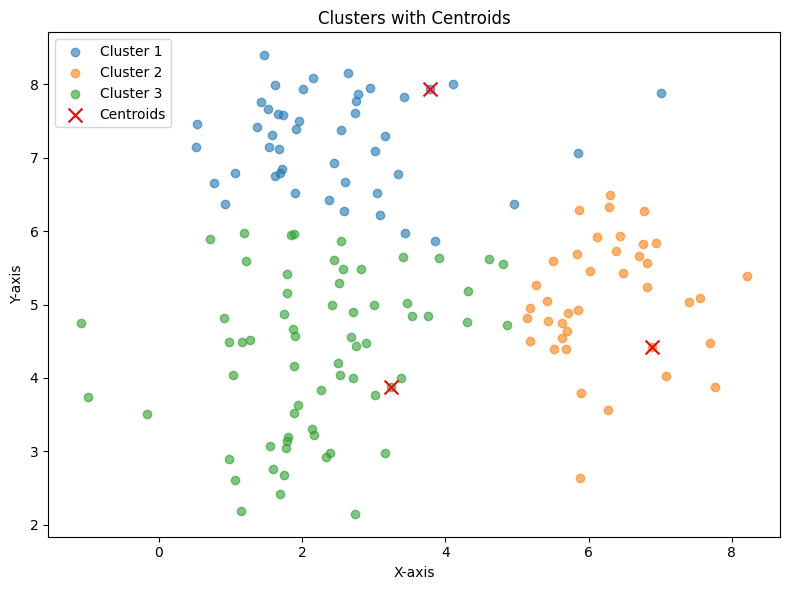

Iteration 2


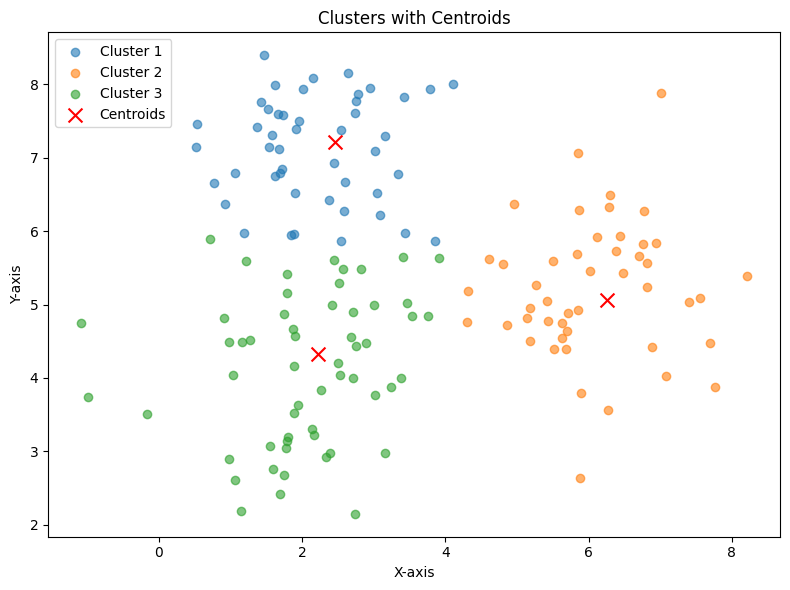

Iteration 3


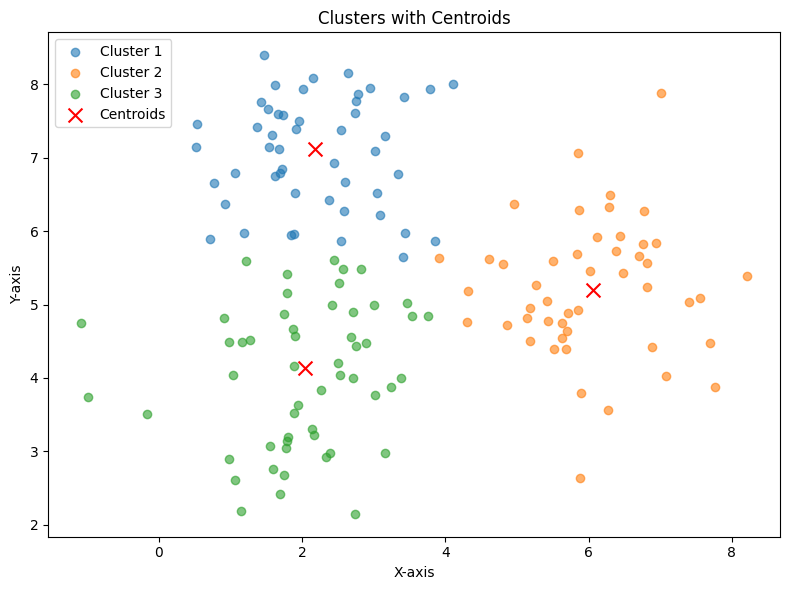

Iteration 4


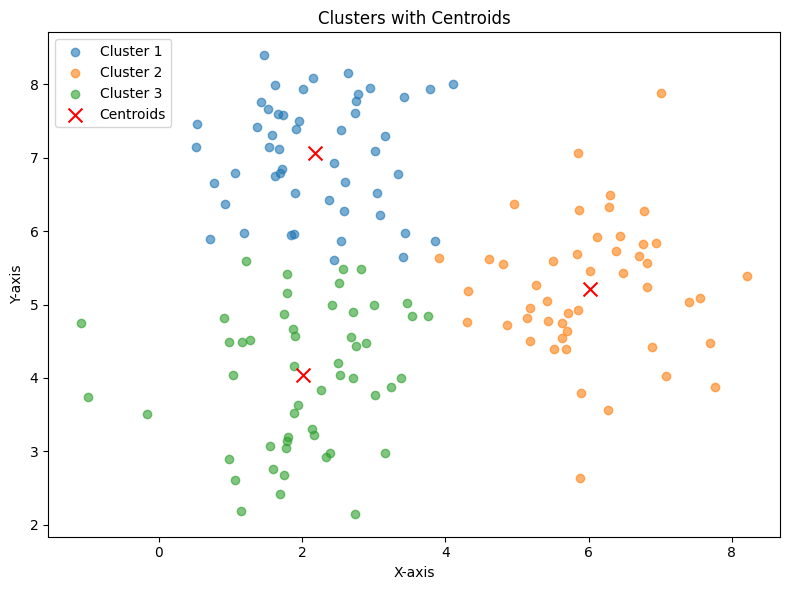

Iteration 5


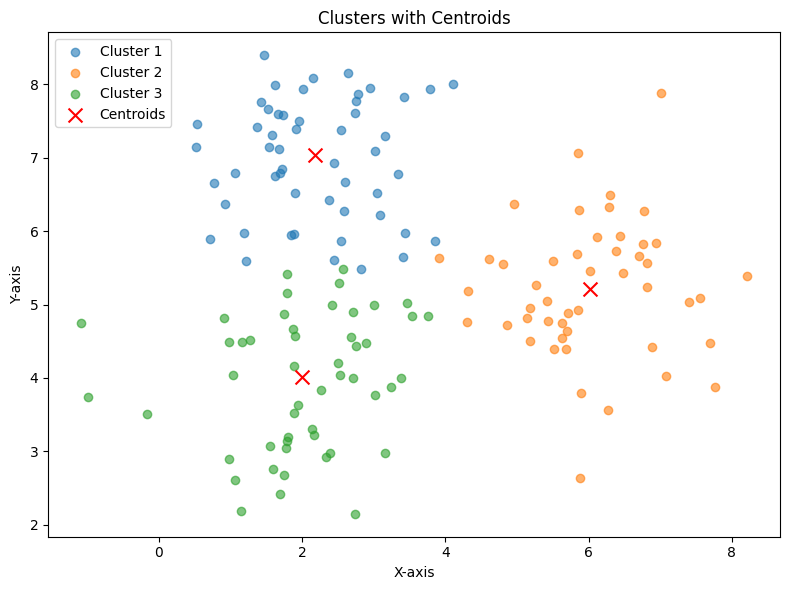

Iteration 6


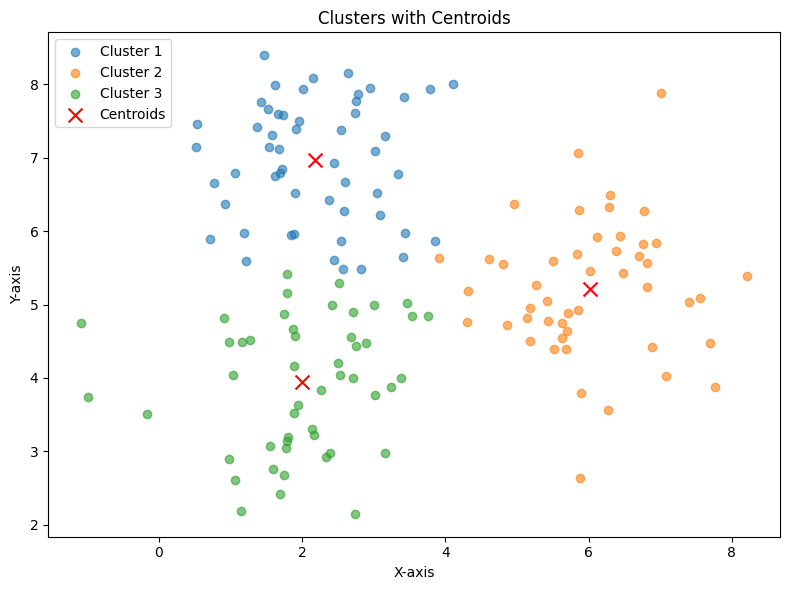

Iteration 7


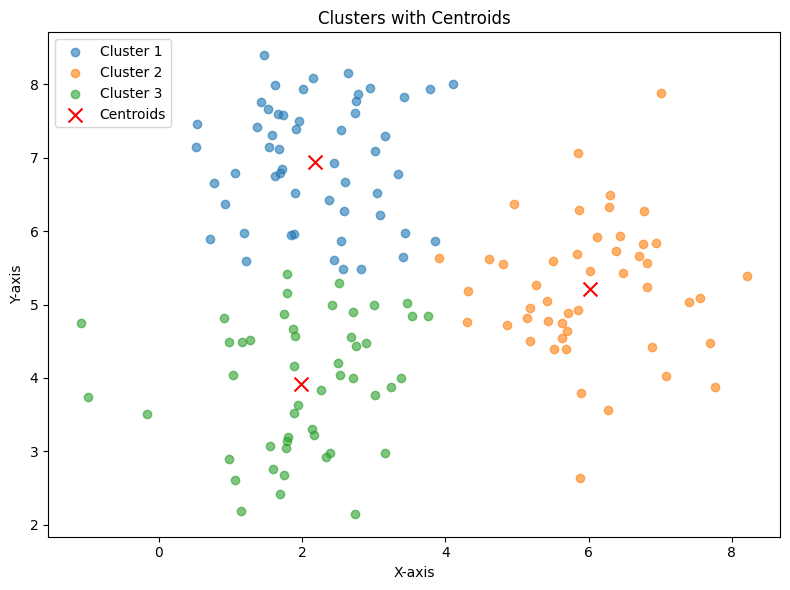

Centroids stabilized.
Final Centroids:
 [[2.1836499  6.94643987]
 [6.0139561  5.21262132]
 [1.98877224 3.91866276]]


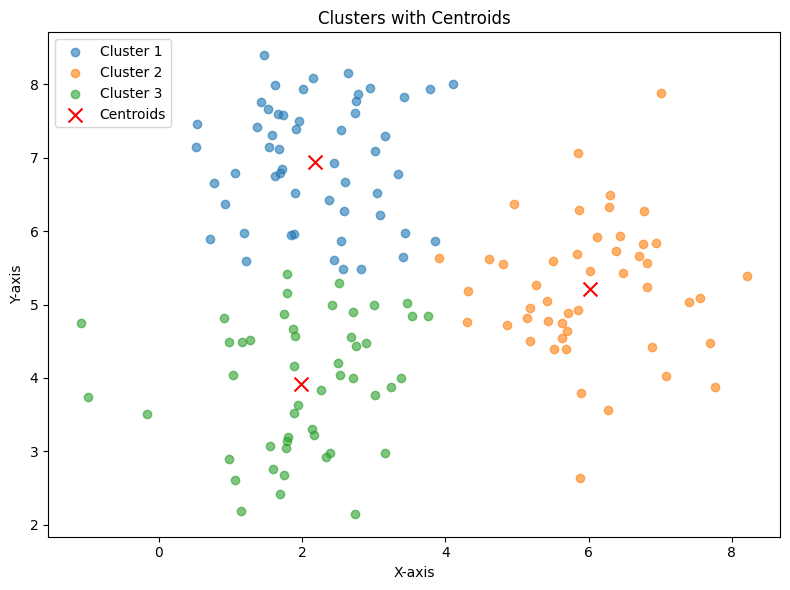

In [73]:
max_iterations = 100
tolerance = 1e-4  # Small tolerance to check centroid movement

# Initialize centroids randomly
centroids = init_centroids(3)
feature_assing = None

for iteration in range(max_iterations):
    print(f"Iteration {iteration + 1}")
    
    # Step 1: Assign points to the closest centroid
    feature_assing = assign_points_to_cluster(centroids, features)
    
    # Step 2: Recalculate centroids
    new_centroids = calculate_position(feature_assingment=feature_assing)

    plot_clusters(centroids, feature_assing)
    
    # Check for convergence
    if np.allclose(centroids, new_centroids, atol=tolerance):
        print("Centroids stabilized.")
        break 
    
    # Update centroids for the next iteration
    centroids = new_centroids
    
print("Final Centroids:\n", centroids)

plot_clusters(centroids, feature_assing)